In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# set the random seed state for reproducibility
random_state = 42
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

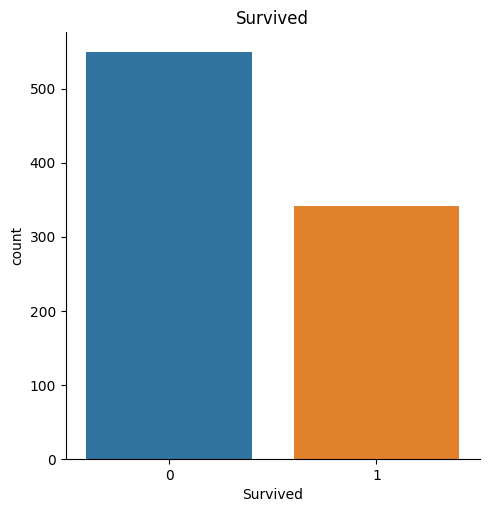

In [3]:
# Survived
sns.catplot(x='Survived', data=train_df, kind='count').set(title='Survived')
plt.show()


In [4]:
survived_perc = round((train_df['Survived'].sum()) / len(train_df.index) * 100,2)
print(f'Percentage who survived: {survived_perc}%')

Percentage who survived: 38.38%


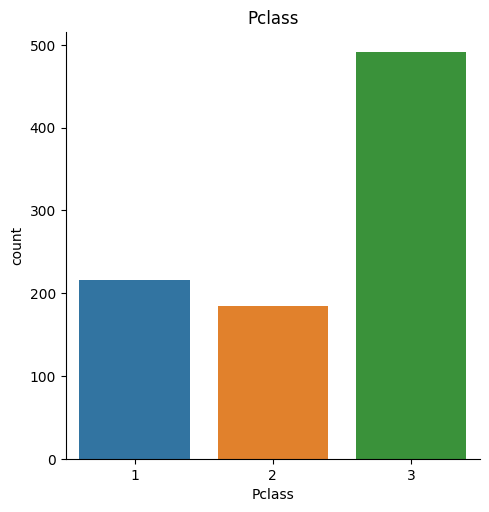

In [5]:
# PClass
sns.catplot(x='Pclass', data=train_df, kind='count').set(title='Pclass')
plt.show()

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
# set dependent variable
dependent_variable = 'Survived'

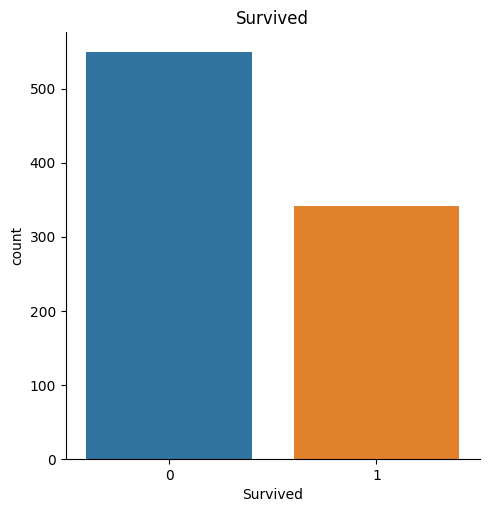

In [8]:
# Survived
sns.catplot(x=dependent_variable, data=train_df, kind='count').set(title=dependent_variable)
plt.show()

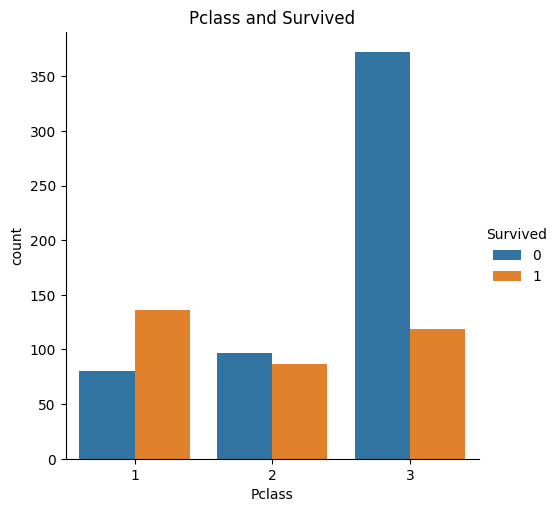

In [9]:
# PClass and Survived
sns.catplot(x='Pclass', hue=dependent_variable, data=train_df, kind='count').set(title='Pclass and Survived')
plt.show()

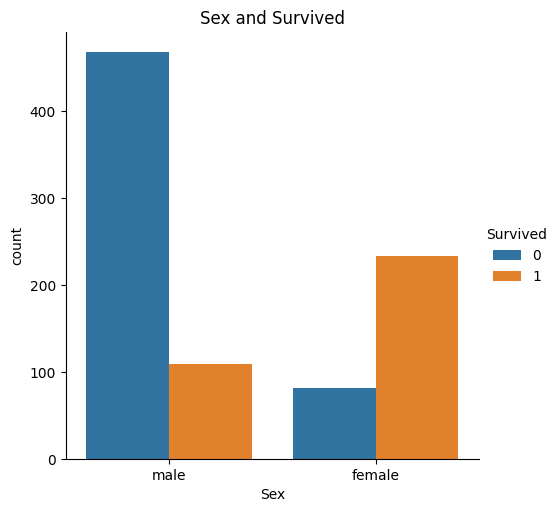

In [10]:
# Sex and Survived
sns.catplot(x='Sex', hue=dependent_variable, data=train_df, kind='count').set(title='Sex and Survived')
plt.show()

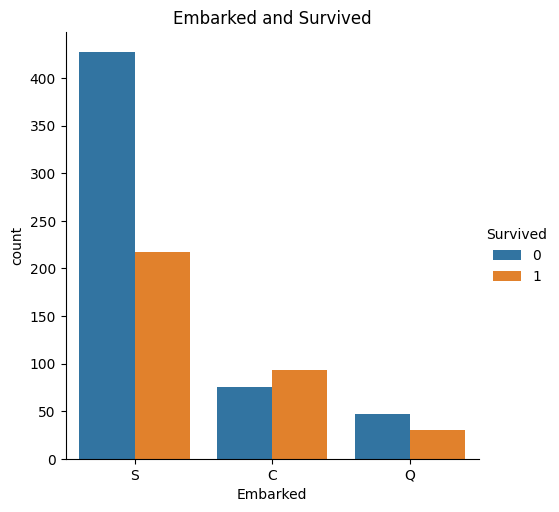

In [11]:
# Embarked and Survived
sns.catplot(x='Embarked', hue=dependent_variable, data=train_df, kind='count').set(title='Embarked and Survived')
plt.show()

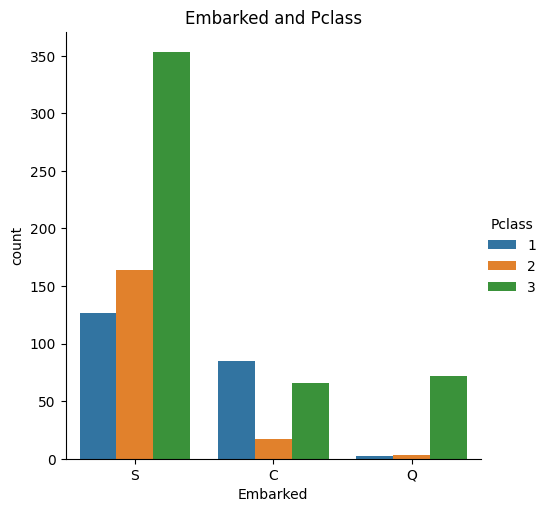

In [12]:
# Embarked and Pclass
sns.catplot(x='Embarked', hue='Pclass', data=train_df, kind='count').set(title='Embarked and Pclass')
plt.show()

In [13]:
# basic distributions of train_df
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


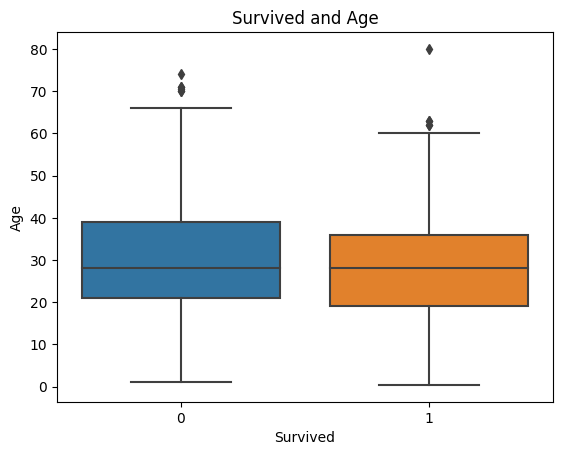

In [14]:
# Survived and Age
sns.boxplot(x=dependent_variable, y='Age', data=train_df).set(title='Survived and Age')
plt.show()

In [15]:
# Cabin impute using 'NA'
train_df['Cabin'] = train_df['Cabin'].fillna('NA') 
test_df['Cabin'] = test_df['Cabin'].fillna('NA') 

In [16]:
# Embarked impute using mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

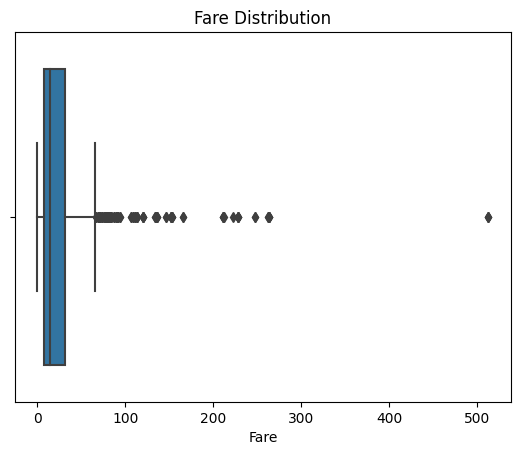

In [17]:
# checking Fare for distribution and outliers
sns.boxplot(x='Fare', data=train_df).set(title='Fare Distribution')
plt.show()

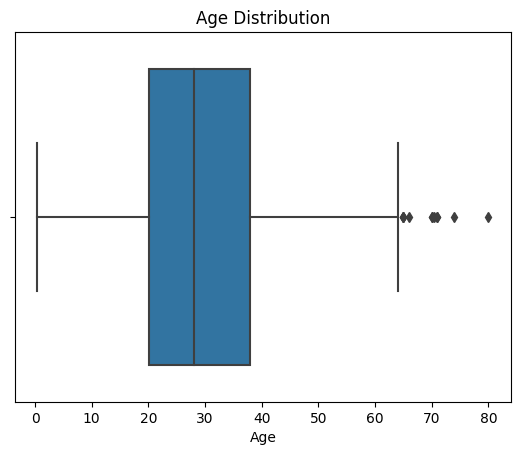

In [18]:
# checking Age for distribution and outliers
sns.boxplot(x='Age', data=train_df).set(title='Age Distribution')
plt.show()

In [19]:
#It appears that Age is relatively symmetrical and that Fare is right skewed.
#I will use mean imputation for Age and median imputation for Fare.

In [20]:
# Age impute
train_age_mean = train_df['Age'].mean()

train_df['Age'] = train_df['Age'].fillna(train_age_mean)

test_df['Age'] = test_df['Age'].fillna(train_age_mean)
# Fare impute
train_fare_median = train_df['Fare'].median()

test_df['Fare'] = test_df['Fare'].fillna(train_fare_median)
#Note: I use attributes from the train dataset in order to impute for the test dataset.

In [21]:
# confirm the imputation worked
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# confirm the imputation worked
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [23]:
#Bucket Age into 'baby', 'child', 'adult', and 'elderly'

In [24]:
# age_bucket
age_bins = [0,1,10,65,100]
age_labels = ['baby','child','adult', 'elderly']

train_df['age_bucket'] = pd.cut(x=train_df['Age'], bins=age_bins,labels=age_labels).astype('object')

test_df['age_bucket'] = pd.cut(x=test_df['Age'], bins=age_bins, labels=age_labels).astype('object')

In [25]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,adult


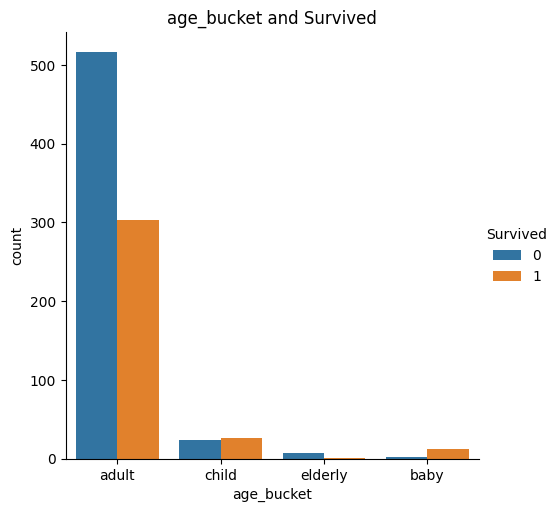

In [27]:
# ship_location and survived
sns.catplot(x='age_bucket', hue=dependent_variable, data=train_df, kind='count').set(title='age_bucket and Survived')
plt.show()

In [28]:
# extract titles
train_df[['last_name','intermediate']] = train_df['Name'].str.split(', ', expand=True)


In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,last_name,intermediate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,adult,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,adult,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,adult,Allen,Mr. William Henry


In [30]:
train_df[['title','first_name']] = train_df['intermediate'].str.split('. ', n=1, expand=True)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,last_name,intermediate,title,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,adult,Braund,Mr. Owen Harris,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,adult,Heikkinen,Miss. Laina,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,adult,Allen,Mr. William Henry,Mr,William Henry


In [32]:
train_df = train_df.drop(columns=['last_name', 'intermediate', 'first_name'])

In [33]:
test_df[['last_name','intermediate']] = test_df['Name'].str.split(', ', expand=True)
test_df[['title','first_name']] = test_df['intermediate'].str.split('.', n=1, expand=True)
test_df = test_df.drop(columns=['last_name', 'intermediate', 'first_name'])

In [34]:
# unique titles
train_title_set = set(train_df['title'].tolist())
test_title_set = set(test_df['title'].tolist())
title_sorted = sorted(train_title_set.union(test_title_set))


In [35]:
print(title_sorted)

['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'th']


In [36]:
# assign titles to roles
def assign_role(row):
    if row['title'] in ['Capt', 'Col', 'Major']:
        return 'officer'
    elif row['title'] in ['Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Master', 'Rev', 'Sir', 'the Countess']:
        return 'important'
    elif row['title'] in ['Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms']:
        return 'average'
    
train_df['role'] = train_df.apply(lambda row: assign_role(row), axis=1)
test_df['role'] = test_df.apply(lambda row: assign_role(row), axis=1)

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,title,role
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,adult,Mr,average
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,average
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,adult,Miss,average
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,average
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,adult,Mr,average


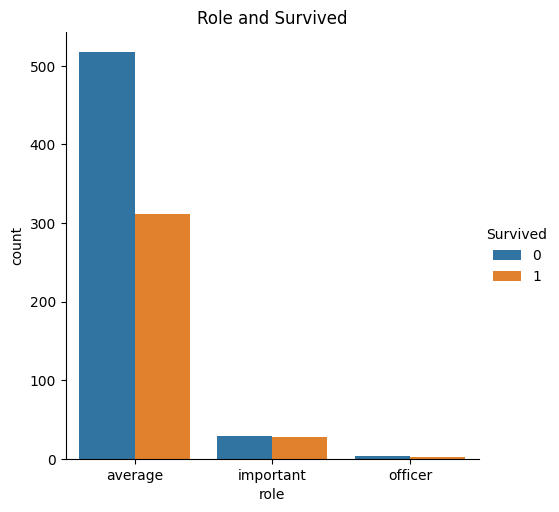

In [38]:
# role and survived
sns.catplot(x='role', hue=dependent_variable, data=train_df, kind='count').set(title='Role and Survived')
plt.show()

In [39]:
train_set = set(train_df['Cabin'].tolist())
test_set = set(test_df['Cabin'].tolist())
sorted_set = sorted(train_set.union(test_set))

print(sorted_set)

print("Number of unique cabins:", len(sorted_set))
print("Number of records:", len(train_df) + len(test_df))

['A10', 'A11', 'A14', 'A16', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A26', 'A29', 'A31', 'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'A9', 'B10', 'B101', 'B102', 'B11', 'B18', 'B19', 'B20', 'B22', 'B24', 'B26', 'B28', 'B3', 'B30', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B45', 'B49', 'B5', 'B50', 'B51 B53 B55', 'B52 B54 B56', 'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103', 'C104', 'C105', 'C106', 'C110', 'C111', 'C116', 'C118', 'C123', 'C124', 'C125', 'C126', 'C128', 'C130', 'C132', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C28', 'C30', 'C31', 'C32', 'C39', 'C45', 'C46', 'C47', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55 C57', 'C6', 'C62 C64', 'C65', 'C68', 'C7', 'C70', 'C78', 'C80', 'C82', 'C83', 'C85', 'C86', 'C87', 'C89', 'C90', 'C91', 'C92', 'C93', 'C95', 'C97', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D22', 'D26', 'D28', 'D30', 'D33', 'D34', 'D35', 'D36

In [40]:
train_df['ship_location'] = train_df['Cabin'].astype(str).str[0]
test_df['ship_location'] = test_df['Cabin'].astype(str).str[0]

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bucket,title,role,ship_location
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,adult,Mr,average,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,average,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,adult,Miss,average,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,average,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,adult,Mr,average,N


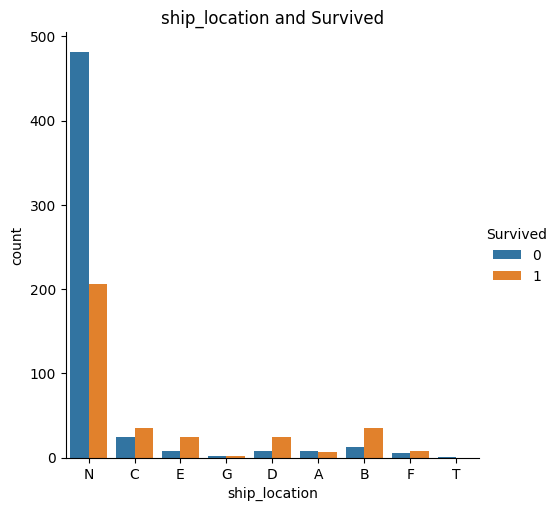

In [42]:
# ship_location and survived
sns.catplot(x='ship_location', hue=dependent_variable, data=train_df, kind='count').set(title='ship_location and Survived')
plt.show()

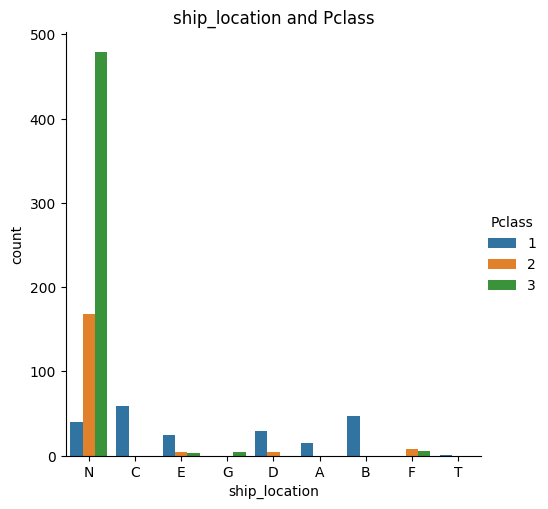

In [43]:
# ship_location and Pclass
sns.catplot(x='ship_location', hue='Pclass', data=train_df, kind='count').set(title='ship_location and Pclass')
plt.show()

In [44]:
# family_size
train_df['family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

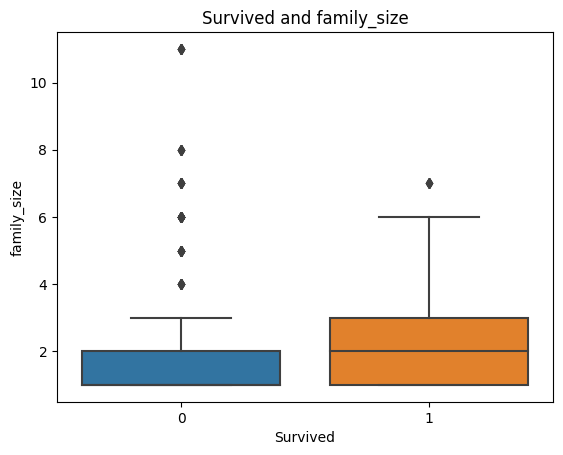

In [45]:
# survival and family_size
sns.boxplot(x='Survived', y='family_size', data=train_df).set(title='Survived and family_size')
plt.show()

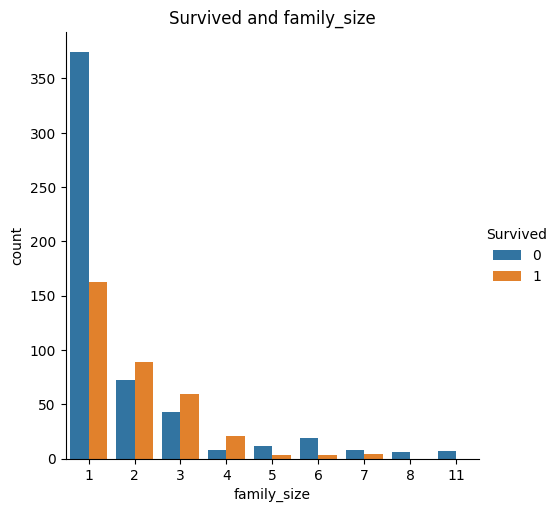

In [46]:
# family_size and survived
sns.catplot(x='family_size', hue=dependent_variable, data=train_df, kind='count').set(title='Survived and family_size')
plt.show()

In [47]:
# create convert to binary
train_df['travel_solo'] = train_df['family_size'].apply(lambda x: 1 if x==1 else 0)
test_df['travel_solo'] = test_df['family_size'].apply(lambda x: 1 if x==1 else 0)

In [48]:
# drop columns
drop_col_list = ['Name', 'Ticket', 'Cabin', 'title']

train_df.drop(drop_col_list, inplace=True, axis=1)
test_df.drop(drop_col_list, inplace=True, axis=1)

In [49]:
# make dummies for the remainder
dummy_col_list = ['Pclass', 'Sex', 'Embarked', 'age_bucket', 'role', 'ship_location']

# convert to dummy percentages for the remainder
for col in dummy_col_list:
    col_agg_df = train_df.groupby(by=col).agg({dependent_variable : 'mean'}).reset_index()
    col_agg_df.columns = [col, f'{col}_survival']
    
    train_df = pd.merge(train_df, col_agg_df, how='left', on=col)
    test_df = pd.merge(test_df, col_agg_df, how='left', on=col)

# get dummies
train_df = pd.get_dummies(train_df, columns=dummy_col_list)
test_df = pd.get_dummies(test_df, columns=dummy_col_list)

In [50]:
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,family_size,travel_solo,Pclass_survival,Sex_survival,...,role_officer,ship_location_A,ship_location_B,ship_location_C,ship_location_D,ship_location_E,ship_location_F,ship_location_G,ship_location_N,ship_location_T
0,1,0,22.0,1,0,7.2500,2,0,0.242363,0.188908,...,False,False,False,False,False,False,False,False,True,False
1,2,1,38.0,1,0,71.2833,2,0,0.629630,0.742038,...,False,False,False,True,False,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,1,1,0.242363,0.742038,...,False,False,False,False,False,False,False,False,True,False
3,4,1,35.0,1,0,53.1000,2,0,0.629630,0.742038,...,False,False,False,True,False,False,False,False,False,False
4,5,0,35.0,0,0,8.0500,1,1,0.242363,0.188908,...,False,False,False,False,False,False,False,False,True,False


In [51]:
# log transform Fare
train_df['fare_log'] = np.log(train_df['Fare']+1)
test_df['fare_log'] = np.log(test_df['Fare']+1)

In [52]:
# confirm that both df have the same dimensions at this point
train_set = set(train_df.columns)
test_set = set(test_df.columns)

test_train_diff_set = test_set - train_set
train_test_diff_set = train_set - test_set
train_test_union_set = train_set.intersection(test_set)
print(f'Missing columns in test not in train: {test_train_diff_set}')
print(f'Missing columns in train not in test: {train_test_diff_set}')

Missing columns in test not in train: set()
Missing columns in train not in test: {'Survived', 'ship_location_T'}


In [53]:
# make sure there are no differences in columns
train_col_list = list(train_test_union_set)
train_col_list.append(dependent_variable)

test_col_list = list(train_test_union_set)

train_df = train_df[train_col_list].copy()
test_df = test_df[test_col_list].copy()

In [54]:
# confirm that both df have the same dimensions at this point
train_set = set(train_df.columns)
test_set = set(test_df.columns)

test_train_diff_set = test_set - train_set
train_test_diff_set = train_set - test_set
train_test_union_set = train_set.intersection(test_set)
print(f'Missing columns in test not in train: {test_train_diff_set}')
print(f'Missing columns in train not in test: {train_test_diff_set}')

Missing columns in test not in train: set()
Missing columns in train not in test: {'Survived'}


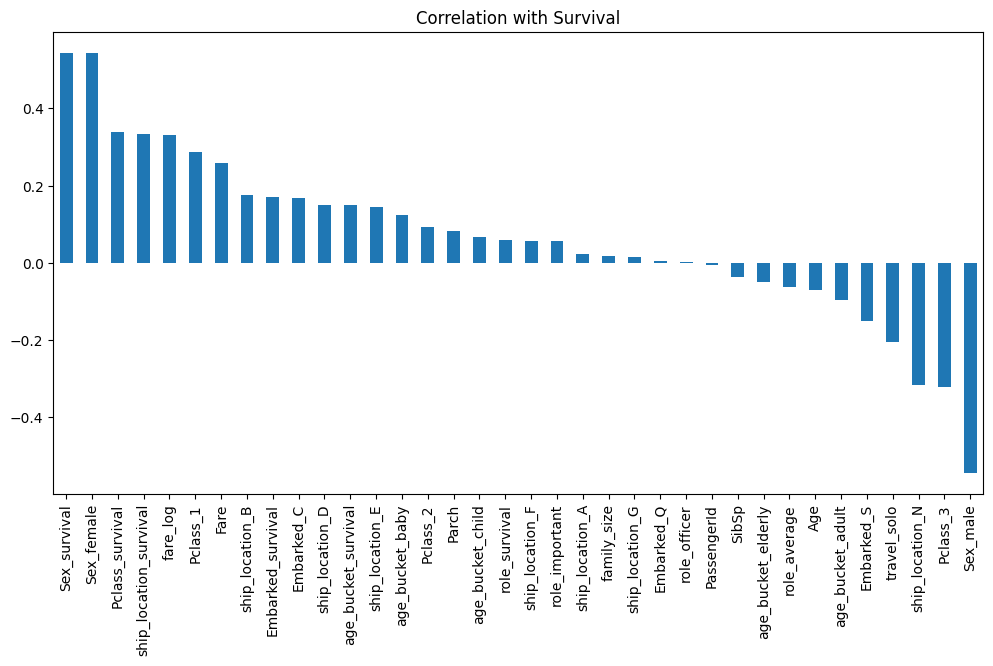

In [55]:
# correlation graph with survival
correlation = train_df.iloc[:, 1:].corr()[dependent_variable].sort_values(ascending=False)

correlation[1:].plot(kind='bar', figsize=(12,6), title='Correlation with Survival')
plt.show()

In [56]:
# split train into x and y
y_train = train_df[dependent_variable].copy()
x_train = train_df.drop(columns=[dependent_variable], axis=1).copy()
# make sure dependent variable is gone
train_df.info()
x_train.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ship_location_C         891 non-null    bool   
 1   ship_location_E         891 non-null    bool   
 2   SibSp                   891 non-null    int64  
 3   ship_location_D         891 non-null    bool   
 4   role_officer            891 non-null    bool   
 5   Embarked_S              891 non-null    bool   
 6   role_average            891 non-null    bool   
 7   Fare                    891 non-null    float64
 8   Embarked_C              891 non-null    bool   
 9   ship_location_A         891 non-null    bool   
 10  ship_location_B         891 non-null    bool   
 11  travel_solo             891 non-null    int64  
 12  ship_location_survival  891 non-null    float64
 13  Parch                   891 non-null    int64  
 14  ship_location_G         891 non-null    bo

In [57]:
print(train_df.columns)
print(test_df.columns)

Index(['ship_location_C', 'ship_location_E', 'SibSp', 'ship_location_D',
       'role_officer', 'Embarked_S', 'role_average', 'Fare', 'Embarked_C',
       'ship_location_A', 'ship_location_B', 'travel_solo',
       'ship_location_survival', 'Parch', 'ship_location_G',
       'age_bucket_adult', 'age_bucket_baby', 'Pclass_survival', 'Pclass_3',
       'ship_location_N', 'Sex_survival', 'Sex_female', 'Embarked_survival',
       'role_important', 'ship_location_F', 'age_bucket_elderly', 'Pclass_2',
       'Sex_male', 'PassengerId', 'Embarked_Q', 'age_bucket_child', 'fare_log',
       'role_survival', 'Pclass_1', 'age_bucket_survival', 'family_size',
       'Age', 'Survived'],
      dtype='object')
Index(['ship_location_C', 'ship_location_E', 'SibSp', 'ship_location_D',
       'role_officer', 'Embarked_S', 'role_average', 'Fare', 'Embarked_C',
       'ship_location_A', 'ship_location_B', 'travel_solo',
       'ship_location_survival', 'Parch', 'ship_location_G',
       'age_bucket_adult', 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV

# from xgboost import XGBClassifier

#from lightgbm import LGBMClassifier

# shared parameters
cv = 10
random_state=42
n_jobs = -1

base_params = {
    'random_state': random_state,
    'n_jobs': n_jobs
}


In [59]:
def feature_select_grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs, select_features=False, best_features=None):
    # use known best features
    if best_features is not None:
        print("Using known best features")
        selected_features = best_features.copy()
    
    # select features
    elif select_features == True:
        print("Selecting features")
        sfs = SequentialFeatureSelector(
            model, 
            scoring='accuracy', 
            direction='backward',
            cv=cv,
            n_jobs=n_jobs
        )

        sfs.fit(x_train, y_train)
        selected_features = list(sfs.get_feature_names_out())
    else:
        print("Skipping feature selection")
        selected_features = list(x_train.columns)[1:]
        
    print("Features:")
    print(selected_features)

    # grid search CV to pick features
    print("Searching for best hyperparameters")
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=cv,
        n_jobs=n_jobs,
        scoring='accuracy'
    )
    x_train_mean = x_train[selected_features].mean()
    x_train[selected_features] = x_train[selected_features].fillna(train_age_mean)
    grid_search.fit(x_train[selected_features].values, y_train.values)

    best_hyperparameters = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best hyperparameters:", best_hyperparameters)
    print("Best mean cross-validated score:", best_score)
    
    return selected_features, best_hyperparameters


In [60]:
rf_best_features = [
    'ship_location_F', 'Pclass_2', 'Ticket_adult_perc', 'Ticket_male_perc', 'role_survival', 'Cabin_average_role_perc', 'ship_location_C', 
    'role_important', 'age_bucket_survival', 'Sex_female', 'Embarked_S', 'ship_location_survival', 'Fare', 'age_bucket_baby', 'Parch', 
    'family_size', 'ship_location_B', 'ship_location_E', 'Cabin_adult_perc', 'age_bucket_adult', 'age_bucket_elderly', 'Age', 'Pclass_3', 
    'fare_log', 'travel_solo', 'Cabin_male_perc', 'Pclass_1', 'Ticket_average_role_perc', 'Sex_survival', 'SibSp', 'ship_location_G', 
    'ship_location_D', 'Sex_male', 'PassengerId', 'name_length', 'role_officer', 'ship_location_N', 'age_bucket_child', 'Embarked_C', 
    'ship_location_A', 'role_average', 'Pclass_survival', 'Embarked_survival']



In [61]:
# random forest classifier
print("Building random forest model")
model = RandomForestClassifier().set_params(**base_params)

param_grid = {
    'n_estimators': [1000],
    'max_depth': [8],
    'min_samples_split': [3],
    'min_samples_leaf': [1]
}

rf_selected_features, rf_best_hyperparameters = feature_select_grid_search_model(x_train, y_train, model, param_grid, cv, n_jobs, 
                                                                                 select_features=False,
                                                                                 best_features=None)

# fit model
rf_model = RandomForestClassifier(**{**base_params,**rf_best_hyperparameters})
rf_model.fit(x_train[rf_selected_features].values, y_train.values)


Building random forest model
Skipping feature selection
Features:
['ship_location_E', 'SibSp', 'ship_location_D', 'role_officer', 'Embarked_S', 'role_average', 'Fare', 'Embarked_C', 'ship_location_A', 'ship_location_B', 'travel_solo', 'ship_location_survival', 'Parch', 'ship_location_G', 'age_bucket_adult', 'age_bucket_baby', 'Pclass_survival', 'Pclass_3', 'ship_location_N', 'Sex_survival', 'Sex_female', 'Embarked_survival', 'role_important', 'ship_location_F', 'age_bucket_elderly', 'Pclass_2', 'Sex_male', 'PassengerId', 'Embarked_Q', 'age_bucket_child', 'fare_log', 'role_survival', 'Pclass_1', 'age_bucket_survival', 'family_size', 'Age']
Searching for best hyperparameters
Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000}
Best mean cross-validated score: 0.8328214731585518


RandomForestClassifier(max_depth=8, min_samples_split=3, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [62]:
X_test = test_df[rf_selected_features].values
predictions = rf_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})

In [63]:
output.to_csv('submission.csv', index=False)